# Analysis on Churning Customers in Credit Card Services

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the dataset
data = pd.read_csv('BankChurners.csv')

In [3]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [6]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [7]:
data.shape

(10127, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame           CLIENTNUM     Attr<...>[10127 rows x 21 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


In [10]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Missing Values

In [11]:
# To find missing values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [12]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Outliers

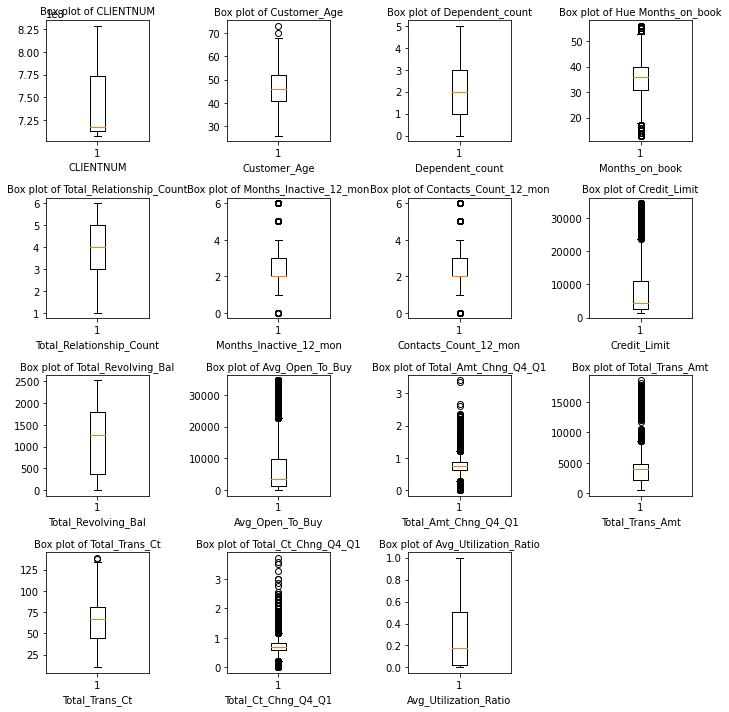

In [13]:
#Checking for outliers

plt.figure(figsize=(10,10))
plt.subplot(4,4,1)
plt.boxplot(data['CLIENTNUM'])
plt.title('Box plot of CLIENTNUM', fontsize=10)
plt.xlabel('CLIENTNUM')

plt.subplot(4,4,2)
plt.boxplot(data['Customer_Age'])
plt.title('Box plot of Customer_Age', fontsize=10)
plt.xlabel('Customer_Age')

plt.subplot(4,4,3)
plt.boxplot(data['Dependent_count'])
plt.title('Box plot of Dependent_count', fontsize=10)
plt.xlabel('Dependent_count')

plt.subplot(4,4,4)
plt.boxplot(data['Months_on_book'])
plt.title('Box plot of Hue Months_on_book', fontsize=10)
plt.xlabel('Months_on_book')

plt.subplot(4,4,5)
plt.boxplot(data['Total_Relationship_Count'])
plt.title('Box plot of Total_Relationship_Count', fontsize=10)
plt.xlabel('Total_Relationship_Count')

plt.subplot(4,4,6)
plt.boxplot(data['Months_Inactive_12_mon'])
plt.title('Box plot of Months_Inactive_12_mon', fontsize=10)
plt.xlabel('Months_Inactive_12_mon')

plt.subplot(4,4,7)
plt.boxplot(data['Contacts_Count_12_mon'])
plt.title('Box plot of Contacts_Count_12_mon', fontsize=10)
plt.xlabel('Contacts_Count_12_mon')

plt.subplot(4,4,8)
plt.boxplot(data['Credit_Limit'])
plt.title('Box plot of Credit_Limit', fontsize=10)
plt.xlabel('Credit_Limit')

plt.subplot(4,4,9)
plt.boxplot(data['Total_Revolving_Bal'])
plt.title('Box plot of Total_Revolving_Bal', fontsize=10)
plt.xlabel('Total_Revolving_Bal')

plt.subplot(4,4,10)
plt.boxplot(data['Avg_Open_To_Buy'])
plt.title('Box plot of Avg_Open_To_Buy', fontsize=10)
plt.xlabel('Avg_Open_To_Buy')

plt.subplot(4,4,11)
plt.boxplot(data['Total_Amt_Chng_Q4_Q1'])
plt.title('Box plot of Total_Amt_Chng_Q4_Q1', fontsize=10)
plt.xlabel('Total_Amt_Chng_Q4_Q1')

plt.subplot(4,4,12)
plt.boxplot(data['Total_Trans_Amt'])
plt.title('Box plot of Total_Trans_Amt', fontsize=10)
plt.xlabel('Total_Trans_Amt')

plt.subplot(4,4,13)
plt.boxplot(data['Total_Trans_Ct'])
plt.title('Box plot of Total_Trans_Ct', fontsize=10)
plt.xlabel('Total_Trans_Ct')

plt.subplot(4,4,14)
plt.boxplot(data['Total_Ct_Chng_Q4_Q1'])
plt.title('Box plot of Total_Ct_Chng_Q4_Q1', fontsize=10)
plt.xlabel('Total_Ct_Chng_Q4_Q1')

plt.subplot(4,4,15)
plt.boxplot(data['Avg_Utilization_Ratio'])
plt.title('Box plot of Avg_Utilization_Ratio', fontsize=10)
plt.xlabel('Avg_Utilization_Ratio')
plt.tight_layout()

In [14]:
#Removing outliers of Customer_Age
Q1 = np.percentile(data['Customer_Age'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Customer_Age'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Customer_Age'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

41.0
46.0
52.0


In [15]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

24.5
68.5


In [16]:
outlier = []
for x in data['Customer_Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [17]:
outlier

[73, 70]

In [18]:
ind1 = data['Customer_Age']>up_lim
data.loc[ind1].index

Int64Index([251, 254], dtype='int64')

In [19]:
ind1 = data['Customer_Age']<low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [20]:
data.drop([251, 254], inplace = True)

Text(0.5, 1.0, 'Box plot of Customer_Age')

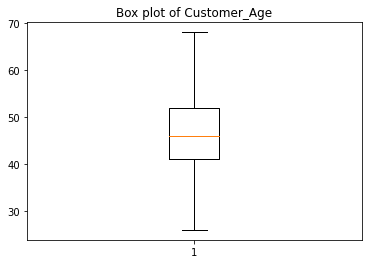

In [21]:
plt.boxplot(data['Customer_Age'])
plt.title('Box plot of Customer_Age')

In [22]:
#Removing outliers of Months_on_book
Q1 = np.percentile(data['Months_on_book'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Months_on_book'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Months_on_book'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

31.0
36.0
40.0


In [23]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

17.5
53.5


In [24]:
outlier = []
for x in data['Months_on_book']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [25]:
outlier

[54,
 56,
 56,
 56,
 54,
 56,
 56,
 56,
 54,
 55,
 56,
 54,
 54,
 56,
 56,
 56,
 56,
 13,
 13,
 56,
 56,
 13,
 56,
 56,
 56,
 15,
 56,
 17,
 13,
 54,
 54,
 13,
 56,
 54,
 13,
 54,
 55,
 54,
 17,
 17,
 56,
 13,
 17,
 16,
 15,
 16,
 56,
 56,
 13,
 56,
 56,
 56,
 17,
 14,
 13,
 13,
 56,
 54,
 54,
 15,
 56,
 16,
 56,
 17,
 17,
 14,
 17,
 55,
 55,
 14,
 13,
 14,
 54,
 54,
 13,
 15,
 13,
 13,
 15,
 13,
 13,
 13,
 17,
 55,
 56,
 56,
 13,
 15,
 55,
 13,
 13,
 55,
 13,
 15,
 16,
 56,
 13,
 56,
 16,
 54,
 16,
 55,
 55,
 16,
 56,
 56,
 17,
 54,
 13,
 13,
 17,
 14,
 56,
 15,
 13,
 13,
 54,
 13,
 17,
 13,
 14,
 13,
 13,
 56,
 15,
 15,
 16,
 13,
 55,
 56,
 17,
 17,
 15,
 17,
 15,
 13,
 56,
 56,
 13,
 54,
 56,
 55,
 15,
 56,
 15,
 56,
 16,
 17,
 13,
 15,
 13,
 56,
 56,
 56,
 13,
 56,
 56,
 17,
 13,
 56,
 16,
 55,
 14,
 14,
 16,
 54,
 17,
 17,
 13,
 17,
 14,
 14,
 14,
 54,
 15,
 56,
 55,
 13,
 14,
 17,
 17,
 56,
 56,
 13,
 15,
 56,
 13,
 56,
 54,
 15,
 55,
 54,
 17,
 56,
 17,
 56,
 54,
 54,
 13,
 13,


In [26]:
ind1 = data['Months_on_book']>up_lim
upl = data.loc[ind1].index

In [27]:
upl

Int64Index([   11,    18,    27,    39,    52,   108,   151,   177,   182,
              187,
            ...
             9093,  9129,  9150,  9594,  9626,  9640,  9873,  9898,  9919,
            10107],
           dtype='int64', length=197)

In [28]:
for u in upl:
    data = data.drop(u)

In [29]:
ind1 = data['Months_on_book']<low_lim
lpl = data.loc[ind1].index

In [30]:
lpl

Int64Index([  514,   521,   560,   766,   803,   890,   964,  1066,  1098,
             1100,
            ...
             9915,  9926,  9929,  9934, 10028, 10042, 10054, 10062, 10069,
            10114],
           dtype='int64', length=188)

In [31]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Months_on_book')

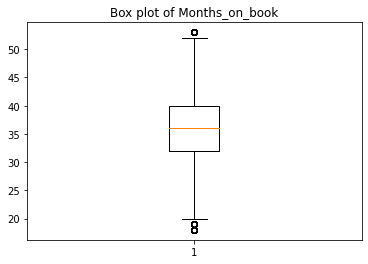

In [32]:
plt.boxplot(data['Months_on_book'])
plt.title('Box plot of Months_on_book')

In [33]:
outlier = []
for x in data['Months_on_book']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print('outlier = ', outlier)

outlier =  []


In [34]:
#Removing outliers of Months_Inactive_12_mon
Q1 = np.percentile(data['Months_Inactive_12_mon'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Months_Inactive_12_mon'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Months_Inactive_12_mon'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

2.0
2.0
3.0


In [35]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

0.5
4.5


In [36]:
outlier = []
for x in data['Months_Inactive_12_mon']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [37]:
outlier

[6,
 0,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 5,
 0,
 5,
 5,
 6,
 6,
 6,
 5,
 6,
 0,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 0,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 6,
 0,
 5,
 6,
 6,
 5,
 6,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 6,
 0,
 6,
 6,
 6,
 0,
 6,
 0,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 0,
 0,
 6,
 6,
 5,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 0,
 5,
 6,
 6,
 6,
 5,
 6,
 6,
 0,
 5,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 0,
 5,
 5,
 0,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 0,
 6,
 6,
 5,
 5,
 6,
 0,
 0,
 6,
 0,
 5,
 5,
 6,
 6,
 0,
 0,
 5,
 0,
 5,
 6,
 0,
 0,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 5,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 6,
 5,
 6,
 5,
 5,
 6,


In [38]:
ind1 = data['Months_Inactive_12_mon']>up_lim
upl = data.loc[ind1].index

In [39]:
upl

Int64Index([   12,    31,   118,   163,   201,   202,   313,   319,   373,
              386,
            ...
             9605,  9879,  9884,  9887,  9932,  9955,  9964, 10035, 10049,
            10066],
           dtype='int64', length=283)

In [40]:
for u in upl:
    data = data.drop(u)

In [41]:
ind1 = data['Months_Inactive_12_mon']<low_lim
lpl = data.loc[ind1].index

In [42]:
lpl

Int64Index([  29, 1470, 1721, 2126, 2671, 3940, 4224, 4302, 4700, 4702, 5116,
            5251, 5592, 5711, 6110, 6470, 6474, 6557, 6597, 6605, 6647, 6663,
            6668, 8442, 9633],
           dtype='int64')

In [43]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Months_Inactive_12_mon')

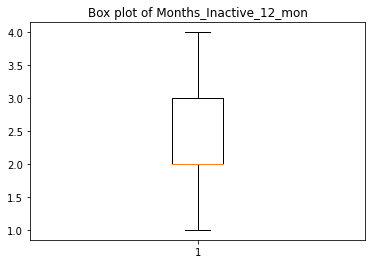

In [44]:
plt.boxplot(data['Months_Inactive_12_mon'])
plt.title('Box plot of Months_Inactive_12_mon')

In [45]:
#Removing outliers of Contacts_Count_12_mon
Q1 = np.percentile(data['Contacts_Count_12_mon'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Contacts_Count_12_mon'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Contacts_Count_12_mon'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

2.0
2.0
3.0


In [46]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

0.5
4.5


In [47]:
outlier = []
for x in data['Contacts_Count_12_mon']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [48]:
outlier

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 0,
 0,
 5,
 0,
 5,
 0,
 5,
 5,
 0,
 5,
 5,
 0,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,


In [49]:
ind1 = data['Contacts_Count_12_mon']>up_lim
upl = data.loc[ind1].index

In [50]:
upl

Int64Index([ 2058,  2116,  2133,  2134,  2140,  2141,  2145,  2147,  2148,
             2156,
            ...
             9967,  9984, 10018, 10025, 10029, 10032, 10096, 10101, 10106,
            10109],
           dtype='int64', length=210)

In [51]:
for u in upl:
    data = data.drop(u)

In [52]:
ind1 = data['Contacts_Count_12_mon']<low_lim
lpl = data.loc[ind1].index

In [53]:
lpl

Int64Index([    2,     4,     8,    20,    41,    46,    53,    56,    80,
               85,
            ...
             9393,  9430,  9495,  9609,  9663,  9757,  9971, 10017, 10077,
            10120],
           dtype='int64', length=374)

In [54]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Contacts_Count_12_mon')

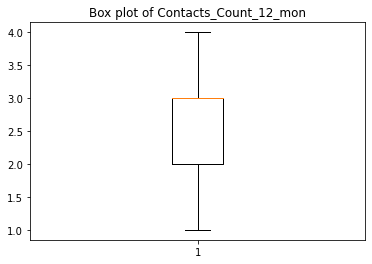

In [55]:
plt.boxplot(data['Contacts_Count_12_mon'])
plt.title('Box plot of Contacts_Count_12_mon')

In [56]:
#Removing outliers of Credit_Limit
Q1 = np.percentile(data['Credit_Limit'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Credit_Limit'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Credit_Limit'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

2548.0
4577.5
11225.0


In [57]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

-10467.5
24240.5


In [58]:
outlier = []
for x in data['Credit_Limit']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [59]:
outlier

[34516.0,
 29081.0,
 30367.0,
 32426.0,
 34516.0,
 34516.0,
 34516.0,
 25300.0,
 34516.0,
 24312.0,
 28904.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 33791.0,
 34516.0,
 34516.0,
 32643.0,
 32975.0,
 34516.0,
 26792.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 24396.0,
 34516.0,
 27126.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 24571.0,
 28202.0,
 24850.0,
 34516.0,
 34516.0,
 24487.0,
 34516.0,
 29659.0,
 26181.0,
 29770.0,
 24602.0,
 34516.0,
 30579.0,
 33304.0,
 27512.0,
 34516.0,
 34516.0,
 26443.0,
 24869.0,
 34516.0,
 30271.0,
 34516.0,
 24742.0,
 27560.0,
 34516.0,
 34516.0,
 34516.0,
 32156.0,
 34516.0,
 34516.0,
 34516.0,
 33864.0,
 26437.0,
 34516.0,
 34516.0,
 32349.0,
 31383.0,
 33951.0,
 30655.0,
 25188.0,
 26442.0,
 26750.0,
 34516.0,
 26977.0,
 34516.0,
 26714.0,
 24880.0,
 34516.0,
 34516.0,
 33406.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 34516.0,
 24545.0,
 34516.0,
 34516.0,
 25878.0,
 34516.0,
 25666.0,


In [60]:
ind1 = data['Credit_Limit']>up_lim
upl = data.loc[ind1].index

In [61]:
upl

Int64Index([    6,     7,    16,    40,    45,    61,    65,    69,    70,
               74,
            ...
            10070, 10079, 10086, 10088, 10095, 10098, 10100, 10104, 10110,
            10112],
           dtype='int64', length=858)

In [62]:
for u in upl:
    data = data.drop(u)

In [63]:
ind1 = data['Credit_Limit']<low_lim
lpl = data.loc[ind1].index

In [64]:
lpl

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot of Credit_Limit')

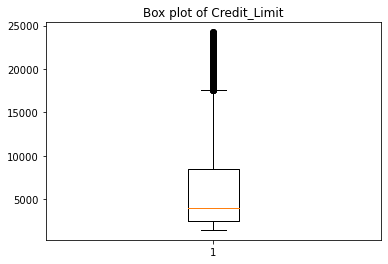

In [65]:
plt.boxplot(data['Credit_Limit'])
plt.title('Box plot of Credit_Limit')

In [66]:
outlier = []
for x in data['Credit_Limit']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
print('Outlier = ', outlier)


Outlier =  []


In [67]:
#Removing outliers of Avg_Open_To_Buy
Q1 = np.percentile(data['Avg_Open_To_Buy'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Avg_Open_To_Buy'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Avg_Open_To_Buy'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

1151.0
2851.0
7333.5


In [68]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

-8122.75
16607.25


In [69]:
outlier = []
for x in data['Avg_Open_To_Buy']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [70]:
outlier

[18023.0,
 21855.0,
 21385.0,
 16984.0,
 17991.0,
 17608.0,
 18386.0,
 18388.0,
 20080.0,
 20758.0,
 19988.0,
 19772.0,
 19607.0,
 19116.0,
 20253.0,
 17942.0,
 21927.0,
 16620.0,
 21411.0,
 20728.0,
 22334.0,
 22251.0,
 16867.0,
 17602.0,
 19936.0,
 17561.0,
 19612.0,
 19254.0,
 18340.0,
 22193.0,
 18284.0,
 16731.0,
 17438.0,
 18959.0,
 21740.0,
 22386.0,
 20754.0,
 17045.0,
 20423.0,
 16952.0,
 20865.0,
 20802.0,
 22697.0,
 17095.0,
 18370.0,
 21162.0,
 18665.0,
 19626.0,
 19038.0,
 19553.0,
 18454.0,
 22009.0,
 21407.0,
 18397.0,
 18037.0,
 17349.0,
 21684.0,
 16868.0,
 20315.0,
 20614.0,
 18539.0,
 18701.0,
 19382.0,
 17018.0,
 20368.0,
 16639.0,
 19535.0,
 19386.0,
 16641.0,
 18548.0,
 19255.0,
 20776.0,
 17009.0,
 18825.0,
 19101.0,
 20584.0,
 17051.0,
 17435.0,
 21442.0,
 18834.0,
 18656.0,
 20588.0,
 19995.0,
 19044.0,
 17496.0,
 21479.0,
 20636.0,
 16721.0,
 20968.0,
 17247.0,
 16993.0,
 20744.0,
 19091.0,
 18237.0,
 19046.0,
 17528.0,
 22278.0,
 17236.0,
 22469.0,
 17531.0,


In [71]:
ind1 = data['Avg_Open_To_Buy']>up_lim
upl = data.loc[ind1].index

In [72]:
upl

Int64Index([   48,    63,    73,    86,   115,   132,   152,   162,   184,
              189,
            ...
             9969,  9970,  9992,  9994, 10005, 10006, 10057, 10093, 10103,
            10108],
           dtype='int64', length=467)

In [73]:
for u in upl:
    data = data.drop(u)

In [74]:
ind1 = data['Avg_Open_To_Buy']<low_lim
lpl = data.loc[ind1].index

In [75]:
lpl

Int64Index([], dtype='int64')

Text(0.5, 1.0, 'Box plot of Avg_Open_To_Buy')

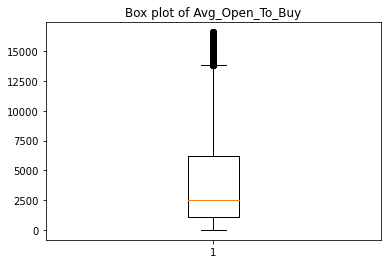

In [76]:
plt.boxplot(data['Avg_Open_To_Buy'])
plt.title('Box plot of Avg_Open_To_Buy')

In [77]:
outlier = []
for x in data['Avg_Open_To_Buy']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [78]:
outlier

[]

In [79]:
#Removing outliers of Total_Amt_Chng_Q4_Q1
Q1 = np.percentile(data['Total_Amt_Chng_Q4_Q1'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Total_Amt_Chng_Q4_Q1'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Total_Amt_Chng_Q4_Q1'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

0.6295
0.733
0.855


In [80]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

0.2912499999999999
1.19325


In [81]:
outlier = []
for x in data['Total_Amt_Chng_Q4_Q1']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [82]:
outlier

[1.335,
 1.541,
 1.405,
 1.376,
 1.524,
 1.7069999999999999,
 1.608,
 1.726,
 1.75,
 1.724,
 1.32,
 1.449,
 1.214,
 2.3569999999999998,
 1.321,
 2.275,
 1.715,
 1.932,
 1.702,
 1.705,
 1.656,
 1.2830000000000001,
 1.6740000000000002,
 1.8730000000000002,
 1.584,
 1.541,
 1.236,
 1.996,
 2.121,
 1.3730000000000002,
 1.456,
 1.791,
 1.768,
 1.642,
 1.242,
 2.3680000000000003,
 1.207,
 1.53,
 1.3019999999999998,
 1.4340000000000002,
 2.145,
 1.859,
 1.7069999999999999,
 1.315,
 1.2229999999999999,
 1.227,
 1.521,
 1.636,
 2.023,
 1.205,
 1.3219999999999998,
 2.271,
 1.3619999999999999,
 1.5659999999999998,
 1.3459999999999999,
 1.391,
 1.337,
 1.297,
 1.328,
 1.455,
 1.242,
 1.226,
 1.516,
 2.282,
 1.485,
 1.4409999999999998,
 1.296,
 1.558,
 2.675,
 2.18,
 1.254,
 1.2790000000000001,
 1.867,
 1.359,
 1.9240000000000002,
 1.554,
 1.419,
 1.301,
 1.568,
 1.632,
 1.5419999999999998,
 1.423,
 1.308,
 1.423,
 1.364,
 1.642,
 1.23,
 1.254,
 1.4509999999999998,
 0.256,
 1.274,
 1.423,
 1.464,
 

In [83]:
ind1 = data['Total_Amt_Chng_Q4_Q1']>up_lim
upl = data.loc[ind1].index

In [84]:
upl

Int64Index([   0,    1,    3,    5,    9,   15,   22,   32,   33,   36,
            ...
            4911, 5181, 5679, 5912, 6303, 6443, 7438, 7757, 9131, 9278],
           dtype='int64', length=253)

In [85]:
for u in upl:
    data = data.drop(u)

In [86]:
ind1 = data['Total_Amt_Chng_Q4_Q1']<low_lim
lpl = data.loc[ind1].index

In [87]:
lpl

Int64Index([  985,  1048,  1693,  1865,  1872,  1874,  1905,  2500,  3306,
             3555,  3596,  3660,  4118,  4153,  4184,  4417,  4443,  4730,
             4952,  5102,  5161,  5800,  5874,  6484,  6541,  6559,  6995,
             7165,  7330,  7761,  7997,  8398,  9136,  9240, 10008, 10119],
           dtype='int64')

In [88]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Total_Amt_Chng_Q4_Q1')

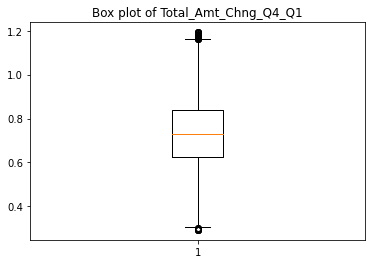

In [89]:
plt.boxplot(data['Total_Amt_Chng_Q4_Q1'])
plt.title('Box plot of Total_Amt_Chng_Q4_Q1')

In [90]:
outlier = []
for x in data['Total_Amt_Chng_Q4_Q1']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [91]:
outlier

[]

In [92]:
#Removing outliers of Total_Trans_Amt
Q1 = np.percentile(data['Total_Trans_Amt'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Total_Trans_Amt'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Total_Trans_Amt'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

2256.5
4041.5
4738.0


In [93]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

-1465.75
8460.25


In [94]:
outlier = []
for x in data['Total_Trans_Amt']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [95]:
outlier

[8947,
 8854,
 8796,
 8778,
 8505,
 8575,
 8644,
 8526,
 9331,
 8571,
 8618,
 8642,
 8904,
 9137,
 8814,
 12535,
 8689,
 8608,
 8677,
 8686,
 8669,
 8752,
 8851,
 8514,
 8609,
 9277,
 8963,
 9081,
 9185,
 8914,
 8751,
 8980,
 8554,
 8920,
 8804,
 8553,
 9406,
 8777,
 8998,
 8785,
 13794,
 14771,
 8838,
 9497,
 8852,
 9523,
 9065,
 14373,
 9339,
 12956,
 15139,
 14132,
 15511,
 14833,
 13630,
 14213,
 14276,
 13400,
 14965,
 13945,
 15200,
 12603,
 14334,
 12403,
 14576,
 13324,
 14465,
 14567,
 13677,
 14084,
 15078,
 13670,
 13719,
 15019,
 14426,
 12592,
 13109,
 12631,
 13090,
 13179,
 13452,
 14533,
 12510,
 15578,
 9322,
 14107,
 14223,
 13791,
 14137,
 12257,
 13212,
 14244,
 17064,
 13598,
 15209,
 16171,
 14991,
 15077,
 13997,
 13866,
 14955,
 13764,
 13945,
 15091,
 13627,
 14252,
 15391,
 13740,
 12867,
 14844,
 15079,
 15549,
 13092,
 12941,
 13681,
 14308,
 14071,
 13090,
 12777,
 14557,
 9330,
 13678,
 14743,
 14082,
 14119,
 13617,
 14326,
 16161,
 15999,
 14511,
 13142,

In [96]:
ind1 = data['Total_Trans_Amt']>up_lim
upl = data.loc[ind1].index

In [97]:
upl

Int64Index([ 8650,  8670,  8708,  8734,  8742,  8747,  8794,  8798,  8847,
             8886,
            ...
            10113, 10115, 10116, 10117, 10118, 10121, 10122, 10123, 10124,
            10126],
           dtype='int64', length=575)

In [98]:
for u in upl:
    data = data.drop(u)

In [99]:
ind1 = data['Total_Trans_Amt']<low_lim
lpl = data.loc[ind1].index

In [100]:
lpl

Int64Index([], dtype='int64')

In [101]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Total_Trans_Amt')

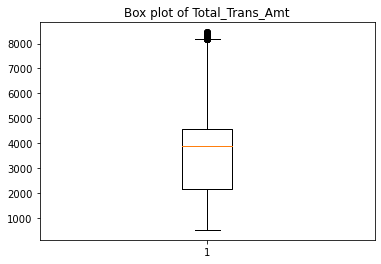

In [102]:
plt.boxplot(data['Total_Trans_Amt'])
plt.title('Box plot of Total_Trans_Amt')

In [103]:
outlier = []
for x in data['Total_Trans_Amt']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [104]:
outlier

[]

In [105]:
#Removing outliers of Total_Trans_Ct
Q1 = np.percentile(data['Total_Trans_Ct'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Total_Trans_Ct'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Total_Trans_Ct'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

45.0
67.0
78.0


In [106]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

-4.5
127.5


In [107]:
outlier = []
for x in data['Total_Trans_Ct']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [108]:
outlier

[]

In [109]:
ind1 = data['Total_Trans_Ct']>up_lim
upl = data.loc[ind1].index

In [110]:
upl

Int64Index([], dtype='int64')

In [111]:
for u in upl:
    data = data.drop(u)

In [112]:
ind1 = data['Total_Trans_Ct']<low_lim
lpl = data.loc[ind1].index

In [113]:
lpl

Int64Index([], dtype='int64')

In [114]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Total_Trans_Ct')

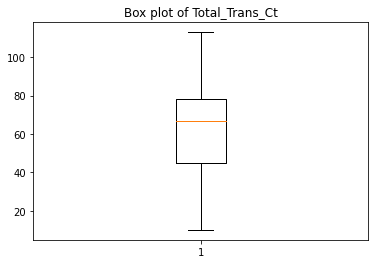

In [115]:
plt.boxplot(data['Total_Trans_Ct'])
plt.title('Box plot of Total_Trans_Ct')

In [116]:
outlier = []
for x in data['Total_Trans_Ct']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [117]:
outlier

[]

In [118]:
'Total_Ct_Chng_Q4_Q1'

'Total_Ct_Chng_Q4_Q1'

In [119]:
#Removing outliers of Total_Ct_Chng_Q4_Q1
Q1 = np.percentile(data['Total_Ct_Chng_Q4_Q1'], 25, interpolation ='midpoint')
Q2 = np.percentile(data['Total_Ct_Chng_Q4_Q1'], 50, interpolation ='midpoint')
Q3 = np.percentile(data['Total_Ct_Chng_Q4_Q1'], 75, interpolation ='midpoint')

print(Q1)
print(Q2)
print(Q3)

0.5710000000000001
0.6920000000000001
0.816


In [120]:
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print(low_lim)
print(up_lim)

0.20350000000000024
1.1834999999999998


In [121]:
outlier = []
for x in data['Total_Ct_Chng_Q4_Q1']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [122]:
ind1 = data['Total_Ct_Chng_Q4_Q1']>up_lim
upl = data.loc[ind1].index

In [123]:
upl

Int64Index([  13,   17,   26,   28,   30,   37,   57,   59,   76,   90,
            ...
            7607, 7669, 7888, 7908, 8344, 8353, 8393, 8399, 8526, 8535],
           dtype='int64', length=155)

In [124]:
for u in upl:
    data = data.drop(u)

In [125]:
ind1 = data['Total_Ct_Chng_Q4_Q1']<low_lim
lpl = data.loc[ind1].index

In [126]:
lpl

Int64Index([ 249,  343,  406,  677,  802,  836,  894, 1046, 1161, 1307, 1350,
            1602, 1612, 1628, 1752, 1818, 1857, 1917, 2019, 2092, 2173, 2174,
            2434, 2898, 3204, 4505, 5225, 5323, 5765, 5811, 6111, 6252, 6402,
            7143, 7557, 7586, 7803, 7948, 8050, 9388],
           dtype='int64')

In [127]:
for l in lpl:
    data = data.drop(l)

Text(0.5, 1.0, 'Box plot of Total_Ct_Chng_Q4_Q1')

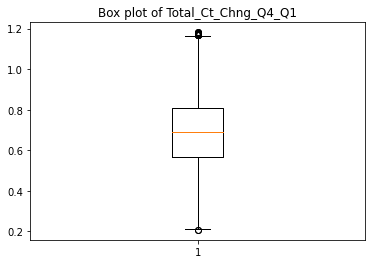

In [128]:
plt.boxplot(data['Total_Ct_Chng_Q4_Q1'])
plt.title('Box plot of Total_Ct_Chng_Q4_Q1')

In [129]:
outlier = []
for x in data['Total_Ct_Chng_Q4_Q1']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [130]:
outlier

[]

In [131]:
data.shape

(6464, 21)

# Data Visualization

# HeatMap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Text major ticklabel objects>)

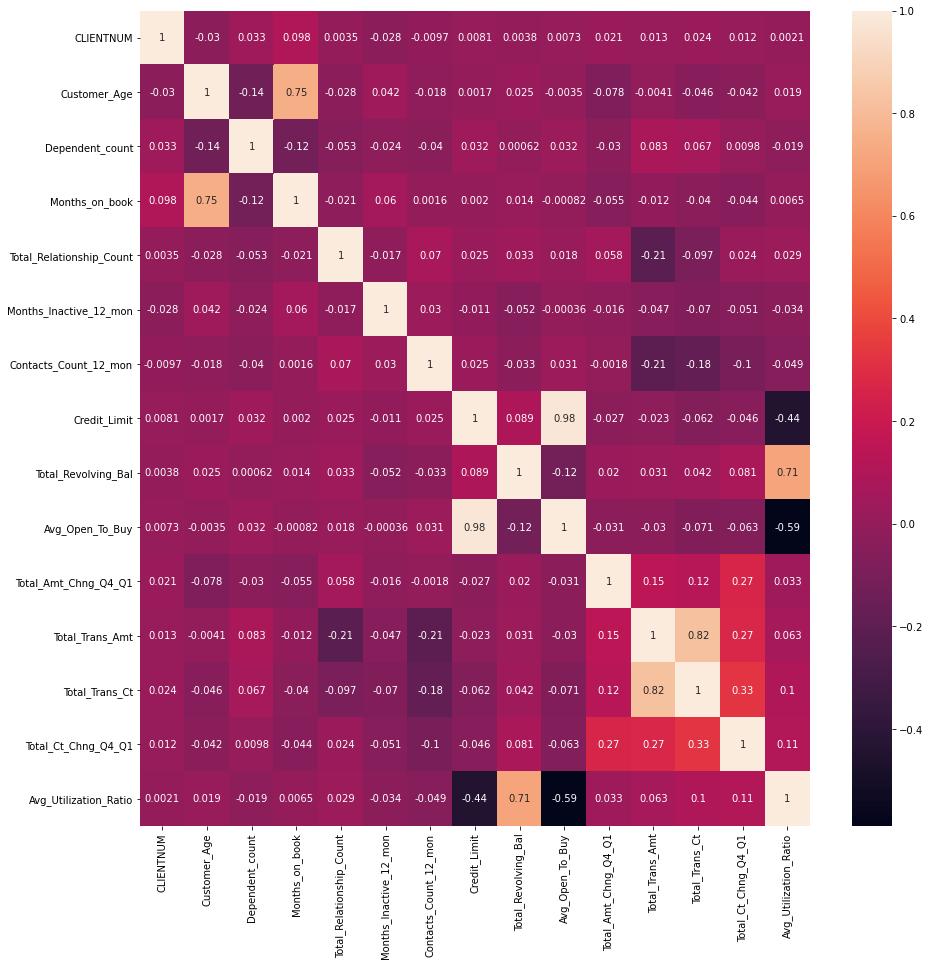

In [132]:
plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot = True)
plt.xticks(rotation = 90)

# Scatter Plot

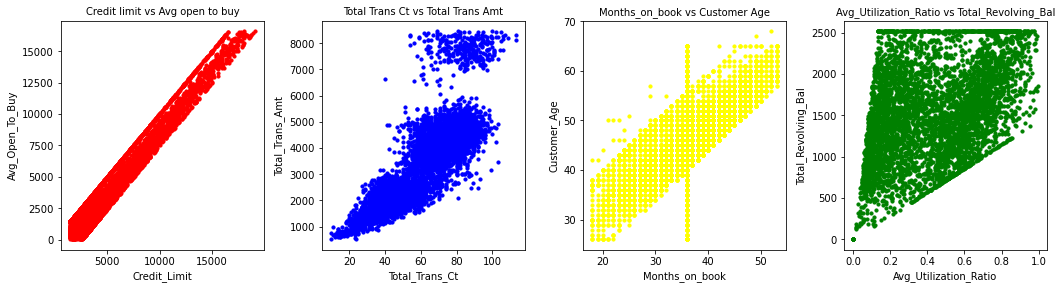

In [133]:
plt.figure(figsize=(15,15))

plt.subplot(4,4,1)
plt.scatter(data['Credit_Limit'], data['Avg_Open_To_Buy'], s=10, marker ='o', c='red')
plt.title('Credit limit vs Avg open to buy', fontsize=10)
plt.xlabel('Credit_Limit')
plt.ylabel('Avg_Open_To_Buy')

plt.subplot(4,4,2)
plt.scatter(data['Total_Trans_Ct'], data['Total_Trans_Amt'], s=10, marker ='o', c='blue')
plt.title('Total Trans Ct vs Total Trans Amt', fontsize=10)
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Total_Trans_Amt')

plt.subplot(4,4,3)
plt.scatter(data['Months_on_book'], data['Customer_Age'], s=10, marker ='o', c='yellow')
plt.title('Months_on_book vs Customer Age', fontsize=10)
plt.xlabel('Months_on_book')
plt.ylabel('Customer_Age')

plt.subplot(4,4,4)
plt.scatter(data['Avg_Utilization_Ratio'], data['Total_Revolving_Bal'], s=10, marker ='o', c='green')
plt.title('Avg_Utilization_Ratio vs Total_Revolving_Bal', fontsize=10)
plt.xlabel('Avg_Utilization_Ratio')
plt.ylabel('Total_Revolving_Bal')

plt.tight_layout()

# Count Plot

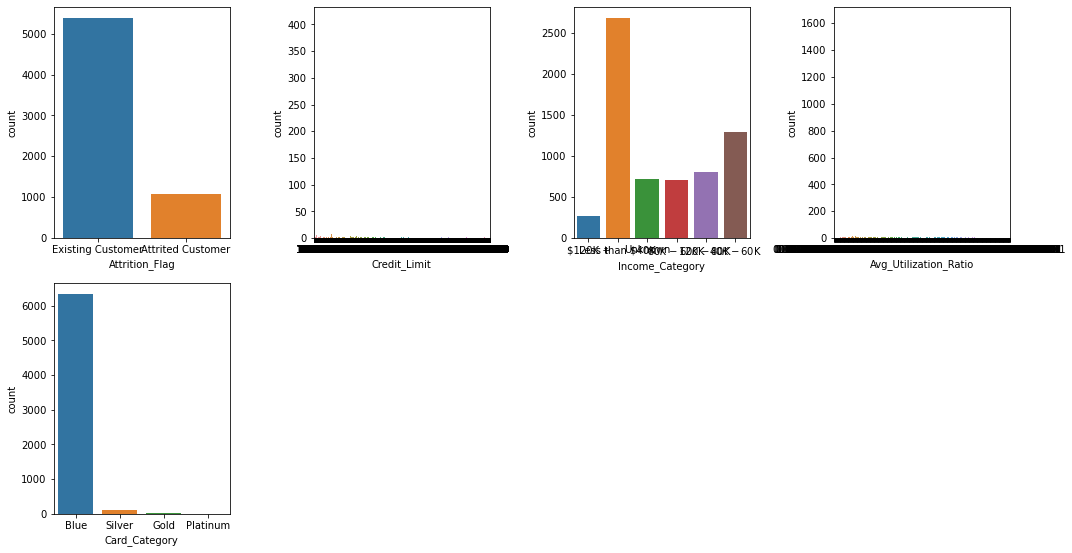

In [134]:
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.countplot(data['Attrition_Flag'])

plt.subplot(4,4,2)
sns.countplot(data['Credit_Limit'])

plt.subplot(4,4,3)
sns.countplot(data['Income_Category'])

plt.subplot(4,4,4)
sns.countplot(data['Avg_Utilization_Ratio'])

plt.subplot(4,4,5)
sns.countplot(data['Card_Category'])

plt.tight_layout()

# Label Encoding

In [135]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Attrition_Flag']= label_encoder.fit_transform(data['Attrition_Flag'])
data['Attrition_Flag'].unique()

array([1, 0])

In [136]:
data['Gender']= label_encoder.fit_transform(data['Gender'])
data['Gender'].unique()

array([1, 0])

In [137]:
data['Education_Level']= label_encoder.fit_transform(data['Education_Level'])
data['Education_Level'].unique()

array([5, 2, 6, 0, 3, 1, 4])

In [138]:
data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])
data['Marital_Status'].unique()

array([3, 1, 2, 0])

In [139]:
data['Income_Category']= label_encoder.fit_transform(data['Income_Category'])
data['Income_Category'].unique()

array([0, 4, 5, 3, 2, 1])

In [140]:
data['Card_Category']= label_encoder.fit_transform(data['Card_Category'])
data['Card_Category'].unique()

array([0, 3, 1, 2])

In [141]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,708790833,1,42,1,5,5,3,0,0,31,...,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,712396908,1,57,0,2,2,1,4,0,48,...,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,709327383,1,45,0,2,2,1,5,0,37,...,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,708508758,0,62,0,0,2,1,4,0,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,811604133,1,47,0,4,6,2,4,0,36,...,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,716832858,0,46,1,3,2,1,2,0,34,...,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,827440458,0,48,1,4,0,1,3,0,44,...,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,717390408,0,49,0,4,5,1,1,0,36,...,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,720328983,0,52,0,5,6,1,4,0,36,...,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


# Feature Reduction

In [142]:
#Dropping unnecessary column clientnum
data = data.drop(['CLIENTNUM'], axis = 1)

In [143]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,0,46,1,3,2,1,2,0,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,0,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,0,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,0,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


# Splitting the dataset

In [144]:
X = data.drop(['Attrition_Flag'], axis=1)

In [145]:
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626


In [146]:
Y = data['Attrition_Flag']

In [147]:
Y.head()

10    1
14    1
19    1
21    0
23    1
Name: Attrition_Flag, dtype: int32

In [148]:
# Splitting the dataset

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.3)

In [149]:
X_train.shape

(4524, 19)

In [150]:
X_test.shape

(1940, 19)

In [151]:
Y_train.shape

(4524,)

In [152]:
Y_test.shape

(1940,)

# Finding best model

# Logistic Regression Model

In [153]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_pred = logit_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.8860824742268041
Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89


C:\Users\vaio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
confusion_matrix(Y_test, Y_pred)

array([[ 186,  150],
       [  71, 1533]], dtype=int64)

In [155]:
data.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,0.832457,46.383354,0.383045,2.389233,3.066368,1.465501,2.991182,0.051207,35.951114,3.939356,2.274443,2.497061,5086.619369,1140.287438,3946.331931,0.728748,3593.340501,62.889697,0.687620,0.320925
std,0.373489,7.505757,0.486167,1.272709,1.833404,0.738657,1.465182,0.380975,7.036086,1.513988,0.863331,0.930341,3924.903369,817.203229,3937.059345,0.162687,1568.457021,19.472322,0.181325,0.283660
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,10.000000,0.293000,510.000000,10.000000,0.207000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,32.000000,3.000000,2.000000,2.000000,2264.000000,0.000000,1018.000000,0.620000,2216.000000,46.000000,0.569000,0.000000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,4.000000,0.000000,36.000000,4.000000,2.000000,3.000000,3359.000000,1250.000000,2229.000000,0.721000,3907.000000,67.000000,0.689000,0.260000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,6846.500000,1766.250000,5714.750000,0.836000,4581.000000,79.000000,0.808000,0.570000
max,1.000000,68.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,53.000000,6.000000,4.000000,4.000000,19099.000000,2517.000000,16598.000000,1.193000,8454.000000,113.000000,1.182000,0.995000


# KNN

In [156]:
from sklearn.neighbors import KNeighborsClassifier 
acc_values = []
neighbors = np.arange(2,50)
for K in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=K, metric='minkowski')
    classifier.fit(X_train, Y_train)
    Y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test, Y_pred)
    acc_values.append(acc)

In [157]:
acc_values

[0.8587628865979381,
 0.8902061855670103,
 0.8927835051546392,
 0.8974226804123712,
 0.8979381443298969,
 0.9051546391752577,
 0.9030927835051547,
 0.904639175257732,
 0.9010309278350516,
 0.904639175257732,
 0.9015463917525773,
 0.9020618556701031,
 0.8994845360824743,
 0.8994845360824743,
 0.9,
 0.8994845360824743,
 0.9005154639175258,
 0.8969072164948454,
 0.8963917525773196,
 0.8974226804123712,
 0.8958762886597939,
 0.8979381443298969,
 0.8963917525773196,
 0.8963917525773196,
 0.8963917525773196,
 0.8963917525773196,
 0.8969072164948454,
 0.8994845360824743,
 0.8974226804123712,
 0.8974226804123712,
 0.8953608247422681,
 0.8953608247422681,
 0.8948453608247423,
 0.8953608247422681,
 0.8912371134020619,
 0.8922680412371135,
 0.8912371134020619,
 0.8943298969072165,
 0.8922680412371135,
 0.893298969072165,
 0.8917525773195877,
 0.8896907216494845,
 0.8907216494845361,
 0.8881443298969072,
 0.8881443298969072,
 0.8865979381443299,
 0.8876288659793814,
 0.8860824742268041]

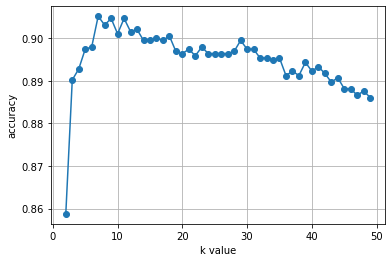

In [158]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [159]:
classifier = KNeighborsClassifier(n_neighbors=40, metric='minkowski')
classifier.fit(X_train, Y_train)
Y_pred=classifier.predict(X_test)

print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.8922680412371135
Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89


In [160]:
confusion_matrix(Y_test, Y_pred)

array([[ 200,  136],
       [  73, 1531]], dtype=int64)

In [161]:
data.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000,6464.000000
mean,0.832457,46.383354,0.383045,2.389233,3.066368,1.465501,2.991182,0.051207,35.951114,3.939356,2.274443,2.497061,5086.619369,1140.287438,3946.331931,0.728748,3593.340501,62.889697,0.687620,0.320925
std,0.373489,7.505757,0.486167,1.272709,1.833404,0.738657,1.465182,0.380975,7.036086,1.513988,0.863331,0.930341,3924.903369,817.203229,3937.059345,0.162687,1568.457021,19.472322,0.181325,0.283660
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,10.000000,0.293000,510.000000,10.000000,0.207000,0.000000
25%,1.000000,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,32.000000,3.000000,2.000000,2.000000,2264.000000,0.000000,1018.000000,0.620000,2216.000000,46.000000,0.569000,0.000000
50%,1.000000,46.000000,0.000000,2.000000,3.000000,1.000000,4.000000,0.000000,36.000000,4.000000,2.000000,3.000000,3359.000000,1250.000000,2229.000000,0.721000,3907.000000,67.000000,0.689000,0.260000
75%,1.000000,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,0.000000,40.000000,5.000000,3.000000,3.000000,6846.500000,1766.250000,5714.750000,0.836000,4581.000000,79.000000,0.808000,0.570000
max,1.000000,68.000000,1.000000,5.000000,6.000000,3.000000,5.000000,3.000000,53.000000,6.000000,4.000000,4.000000,19099.000000,2517.000000,16598.000000,1.193000,8454.000000,113.000000,1.182000,0.995000


# Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

Y_pred = dt_model.predict(X_test)
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.9371134020618557
Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94


In [163]:
Y_test.value_counts()

1    1604
0     336
Name: Attrition_Flag, dtype: int64

In [164]:
confusion_matrix(Y_test, Y_pred)

array([[ 277,   59],
       [  63, 1541]], dtype=int64)

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.959278350515464
Micro Precision: 0.96
Micro Recall: 0.96
Micro F1-score: 0.96


In [166]:
confusion_matrix(Y_test, Y_pred)

array([[ 284,   52],
       [  27, 1577]], dtype=int64)

# Gradient Boosting

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting object
gb = GradientBoostingClassifier()

#Train model
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)

print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.9685567010309278
Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97


In [168]:
confusion_matrix(Y_test, Y_pred)

array([[ 295,   41],
       [  20, 1584]], dtype=int64)

# Extreme Gradient Boost

In [169]:
from xgboost import XGBClassifier

#Create Extreme Gradient Boost object
xgb = XGBClassifier()

#Train model
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

C:\Users\vaio\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:40:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is: 0.9680412371134021
Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97


In [170]:
confusion_matrix(Y_test, Y_pred)

array([[ 292,   44],
       [  18, 1586]], dtype=int64)

# Naive Bayes Classifiers

# Gaussian Naive Bayes Classifier

In [171]:
from sklearn.naive_bayes import GaussianNB
Bayes_Gauss = GaussianNB()
Bayes_Gauss.fit(X_train, Y_train)
Y_pred = Bayes_Gauss.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.8737113402061856
Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87


In [172]:
confusion_matrix(Y_test, Y_pred)

array([[ 241,   95],
       [ 150, 1454]], dtype=int64)

# Bernoulli Naive Bayes Classifier

In [173]:
from sklearn.naive_bayes import BernoulliNB
Bayes_Berno = BernoulliNB()
Bayes_Berno.fit(X_train, Y_train)
Y_pred = Bayes_Berno.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.7520618556701031
Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75


In [174]:
confusion_matrix(Y_test, Y_pred)

array([[ 193,  143],
       [ 338, 1266]], dtype=int64)

# Feature Importance

In [175]:
pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)*100

Total_Trans_Amt             23.530484
Total_Trans_Ct              18.822816
Total_Ct_Chng_Q4_Q1          9.503265
Total_Revolving_Bal          8.979122
Avg_Utilization_Ratio        6.557354
Total_Relationship_Count     5.801666
Total_Amt_Chng_Q4_Q1         4.695543
Credit_Limit                 3.881274
Customer_Age                 3.364653
Avg_Open_To_Buy              3.284190
Months_Inactive_12_mon       2.706441
Months_on_book               2.041209
Dependent_count              1.259886
Income_Category              1.180225
Contacts_Count_12_mon        1.151905
Education_Level              1.073999
Gender                       1.064288
Marital_Status               0.979761
Card_Category                0.121920
dtype: float64

In [176]:
X = data.drop(['Attrition_Flag','Income_Category','Contacts_Count_12_mon','Gender','Card_Category','Dependent_count','Education_Level','Marital_Status',], axis=1)

In [177]:
X

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,31,5,3,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
14,57,48,5,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
19,45,37,6,1,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,62,49,2,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,47,36,3,3,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...
10022,46,34,1,2,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,48,44,2,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,49,36,5,2,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
10089,52,36,4,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


In [178]:
Y

10       1
14       1
19       1
21       0
23       1
        ..
10022    0
10048    0
10067    0
10089    0
10125    0
Name: Attrition_Flag, Length: 6464, dtype: int32

In [179]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# Gradient Boosting with new X and Y

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting object
gb = GradientBoostingClassifier()

#Train model
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)

print('Accuracy is:', accuracy_score(Y_test, Y_pred))
print('Micro Precision: {:.2f}'.format(precision_score(Y_test, Y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Y_test, Y_pred, average='micro')))
print('Micro F1-score: {:.2f}'.format(f1_score(Y_test, Y_pred, average='micro')))

Accuracy is: 0.9675257731958763
Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97


In [181]:
confusion_matrix(Y_test, Y_pred)

array([[ 294,   42],
       [  21, 1583]], dtype=int64)